In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
decimation_data = pd.read_csv("Decimation.csv")
pti_data = pd.read_csv("PTI_Inversion.csv")

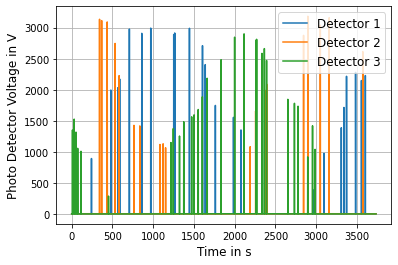

In [6]:
time = np.arange(len(decimation_data["DC CH1"]))
for channel in range(1, 4):
    plt.plot(time, decimation_data[f"DC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("Time in s", fontsize=12)
plt.ylabel("Photo Detector Voltage in V", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

The X and Y Values

PTI Signal

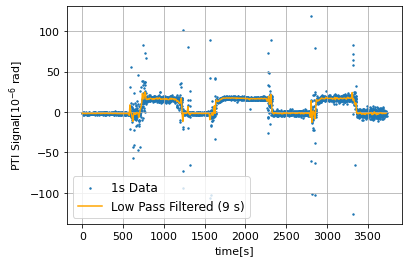

In [69]:
pti_mean = np.mean(np.array(pti_data["PTI Signal"]).reshape(-1, 9), axis=1)
time_mean = np.arange(pti_mean.size)
time_mean *= 9
fig, ax = plt.subplots()
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
plt.scatter(time, -pti_data["PTI Signal"] * 1e6, s=2, label="1s Data")
plt.plot(time_mean, -pti_mean * 1e6, label="Low Pass Filtered (9 s)", color="orange")
plt.grid()
plt.xlabel("time[s]", fontsize=11)
plt.legend(fontsize=12)
plt.ylabel("PTI Signal[$10^{-6}$ rad]", fontsize=11)
plt.savefig("pti.pdf", dpi=400, bbox_inches="tight")

Interferometric Phase

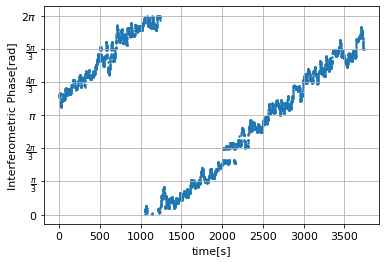

In [67]:
phases = pti_data["Interferometric Phase"].to_numpy()
phases[np.where(phases < 0)] += 2 * np.pi
fig, ax = plt.subplots()
plt.yticks([0, np.pi / 3, 2 / 3 * np.pi, np.pi, 4 * np.pi / 3, 5 * np.pi / 3, 2 * np.pi],
           ['$0$', r'$\frac{\pi}{3}$', r'$\frac{2\pi}{3}$', r'$\pi$', r'$\frac{4\pi}{3}$', r'$\frac{5\pi}{3}$', r'$2\pi$'])
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
plt.scatter(time, phases, s=2)
plt.grid()
plt.xlabel("time[s]", fontsize=11)
plt.ylabel("Interferometric Phase[rad]", fontsize=11)
plt.savefig("pti.pdf", dpi=400, bbox_inches="tight")